# Лаба 1_2

In [99]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [69]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [73]:
df.shape

(442, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [71]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [85]:
df.columns[:-1]

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], dtype='object')

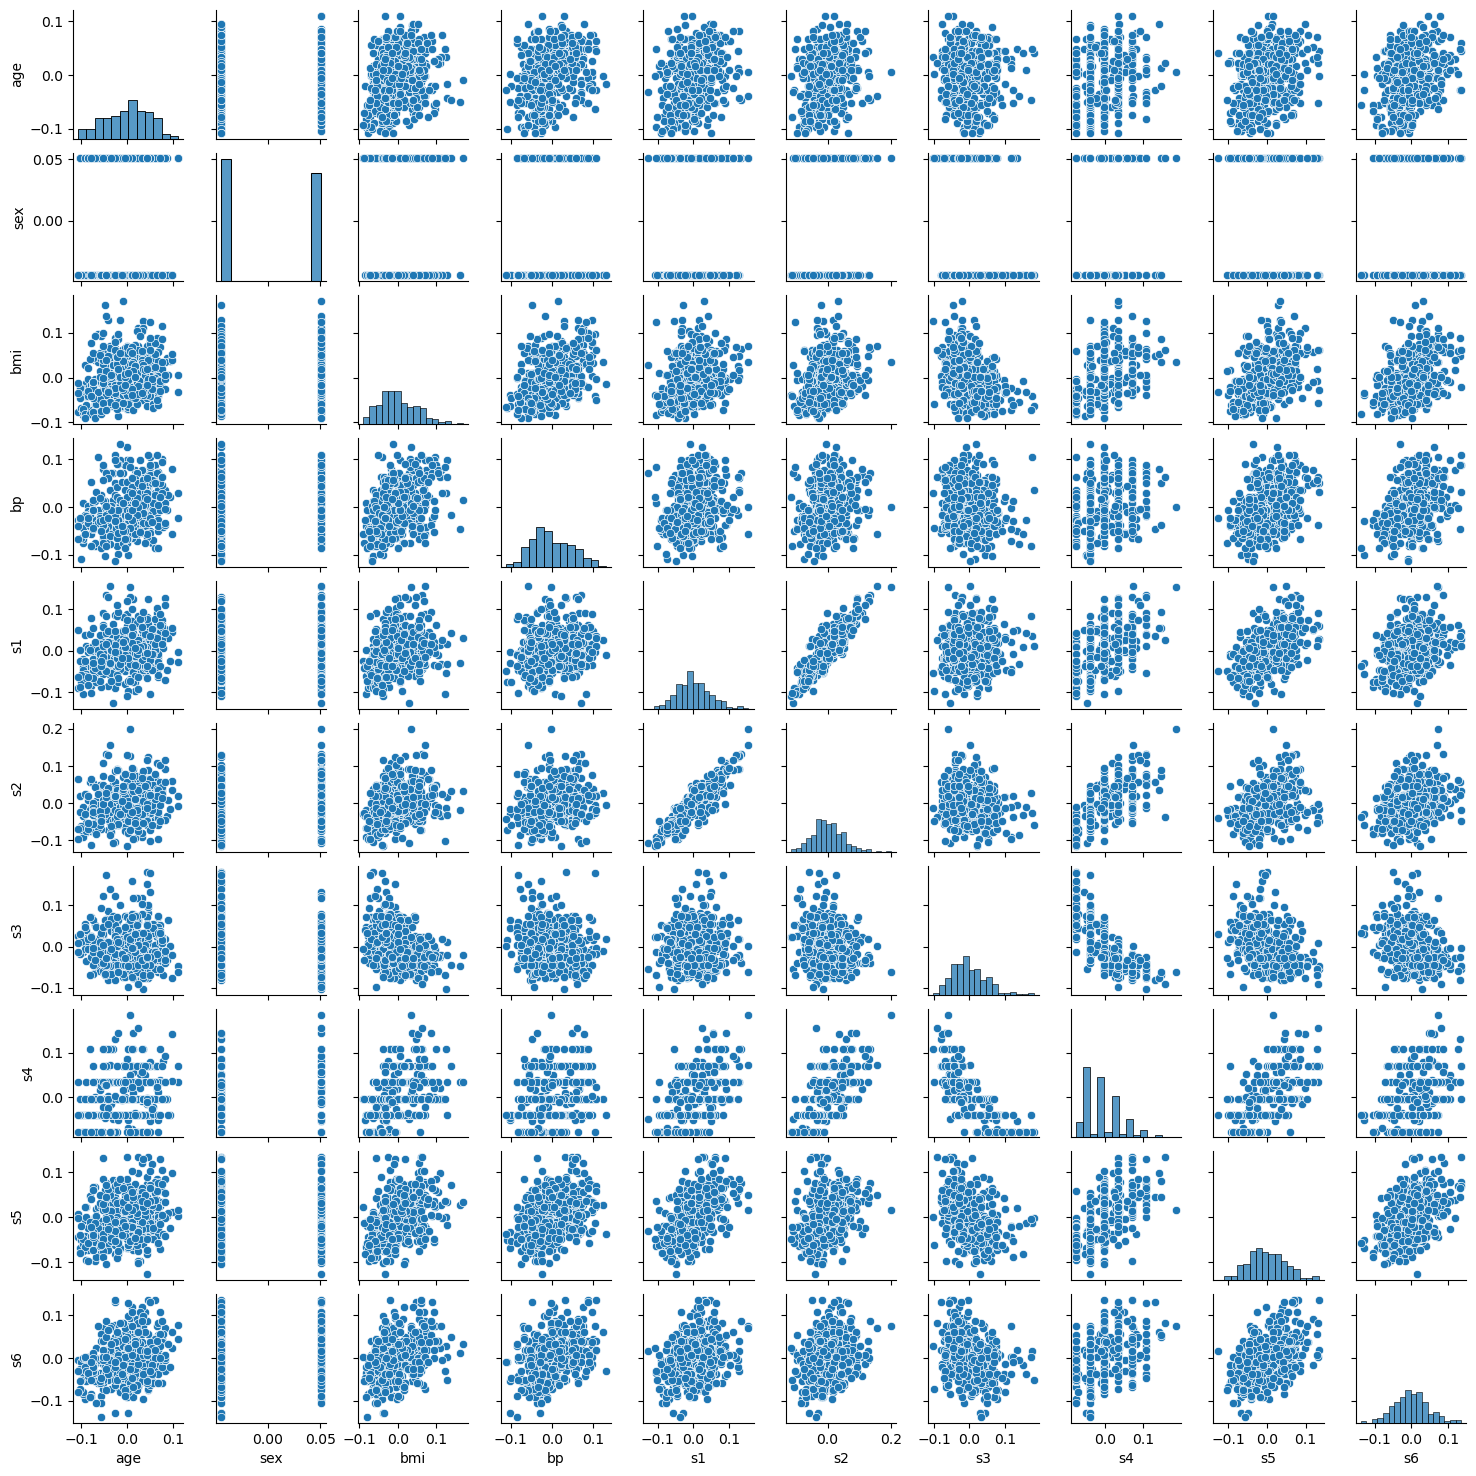

In [125]:
sns.pairplot(df, height=1.5)
plt.show()

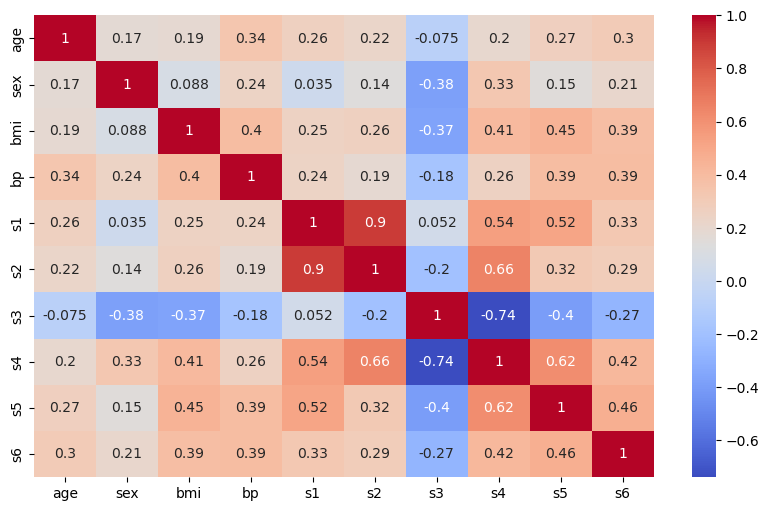

In [123]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

s1 и s2 практически идентичны, s2 и s4 - сильная положительная связь, s3 и s4 - сильная отрицательная связь. Для линейной регрессии лучшего всего использовать s2 и s4 или s3 и s4

In [152]:
X = df[['s2']]
y = df['s4']   

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((353, 1), (89, 1))

In [188]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

#### Результаты Scikit-Learn

In [159]:
print(f"Коэффициент (a): {model.coef_[0]:.4f}")
print(f"Свободный член (b): {model.intercept_:.4f}")

Коэффициент (a): 0.6569
Свободный член (b): 0.0009


#### Собственный алгоритм

In [178]:
x_mean = X_train['s2'].mean()
y_mean = y_train.mean()

numerator = ((X_train['s2'] - x_mean) * (y_train - y_mean)).sum()
denominator = ((X_train['s2'] - x_mean) ** 2).sum()

a = numerator / denominator
b = y_mean - a * x_mean

print(f'Уравнение регрессионной прямой: y = {a:.2f}x + {b:.2f}')

Уравнение регрессионной прямой: y = 0.66x + 0.00


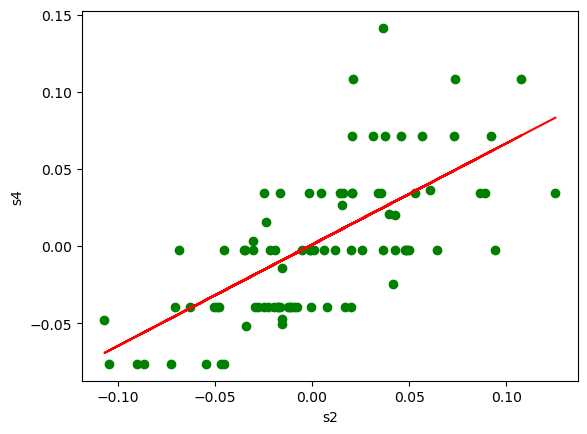

In [196]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, predict, color='r')
plt.xlabel('s2')
plt.ylabel('s4')

plt.show()

In [198]:
df_pred = pd.DataFrame({'Реальный': y_test, 'Предсказаный': predict})
df_pred

,Реальный,Предсказаный
287,0.034309,0.083143
211,-0.039493,-0.010036
72,-0.002592,0.032954
321,0.141322,0.024932
73,0.034309,0.035834
...,...,...
255,-0.039493,-0.011887
90,-0.076395,-0.028754
57,-0.076395,-0.067630
391,-0.039493,-0.032251


In [212]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [206]:
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

Coefficient of determination: 0.46


In [218]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, predict))

Mean absolute error: 0.03


In [216]:
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, predict))

Mean absolute percentage error: 2.83
